In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

: 

In [6]:
data=pd.read_csv('crime_data.csv',index_col=0)

In [8]:
data.isnull().sum()#No missing values

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [13]:
import seaborn as sns

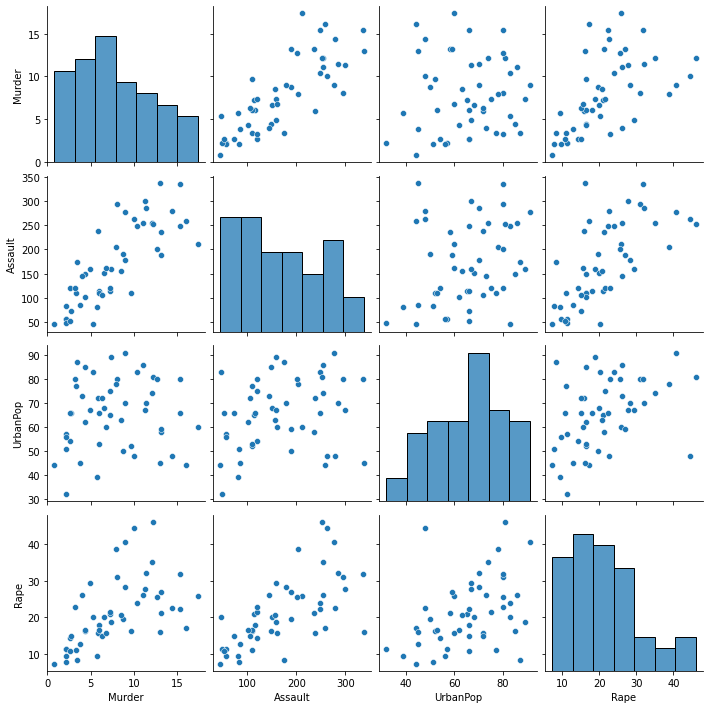

In [14]:
sns.pairplot(data)

In [17]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled_data=scale.fit_transform(data)

In [18]:
#Performing Clustering on Scaled Data

In [19]:
data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [69]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
linked = linkage(scaled_data, method='ward')
k=4
labels = fcluster(linked, k, criterion='maxclust')

# Calculate silhouette score
s1= silhouette_score(scaled_data, labels, metric='euclidean')

print("Silhouette Score:", s1)


Silhouette Score: 0.3370187183556962


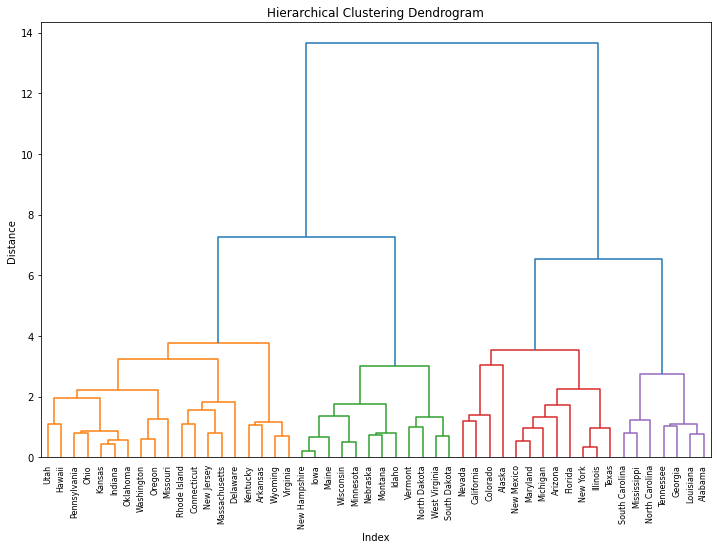

In [70]:
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True,color_threshold=linked[-k+1,2])
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()
#4 clusters with different colors

# KMeans

In [143]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,init='k-means++',n_init=10,random_state=42)
kmeans.fit(scaled_data,y=data.index)

KMeans(n_clusters=4, random_state=42)

In [144]:
k_means_pred=kmeans.predict(scaled_data)

In [145]:
df=pd.DataFrame({'Cluster_labels':k_means_pred},index=data.index)

In [146]:
label0=data[df.Cluster_labels==0]
label1=data[df.Cluster_labels==1]
label2=data[df.Cluster_labels==2]
label3=data[df.Cluster_labels==3]

In [164]:
label0[data.columns[0]]

Connecticut      3.3
Delaware         5.9
Hawaii           5.3
Indiana          7.2
Kansas           6.0
Massachusetts    4.4
New Jersey       7.4
Ohio             7.3
Oklahoma         6.6
Oregon           4.9
Pennsylvania     6.3
Rhode Island     3.4
Utah             3.2
Virginia         8.5
Washington       4.0
Wyoming          6.8
Name: Murder, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

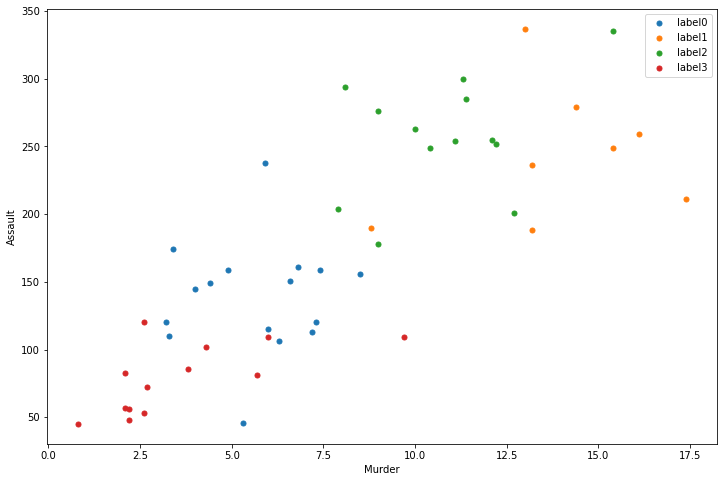

In [170]:
import matplotlib.cm as cm

colormap = cm.get_cmap('tab10')
plt.figure(figsize=(12, 8))


plt.scatter(label0[data.columns[0]], label0[data.columns[1]], s=25, label='label0', c=colormap(0))

plt.scatter(label1[data.columns[0]], label1[data.columns[1]], s=25, label='label1', c=colormap(1))

plt.scatter(label2[data.columns[0]], label2[data.columns[1]], s=25, label='label2', c=colormap(2))

plt.scatter(label3[data.columns[0]], label3[data.columns[1]], s=25, label='label3', c=colormap(3))

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.legend()
plt.show()


In [148]:
silhouette_score(scaled_data,k_means_pred)

0.33968891433344395

In [149]:
kmeans.inertia_#WCSS

57.55425863091104

# DB SCAN

In [173]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.5,min_samples=5)
db.fit_predict(scaled_data)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [179]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

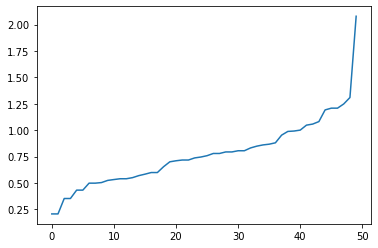

In [183]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)#taking epsilon as 1.28

In [189]:
db=DBSCAN(eps=1.28,min_samples=5)
db_scan_labels=db.fit_predict(scaled_data)

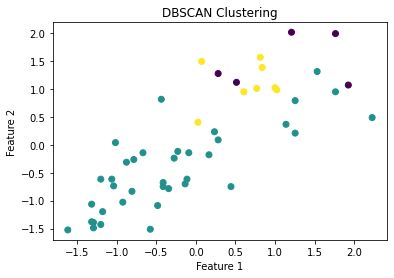

In [193]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=db_scan_labels, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.show()

In [195]:
silhouette_score(scaled_data, db_scan_labels)

0.2244158694902788

# Interpretation of the Results

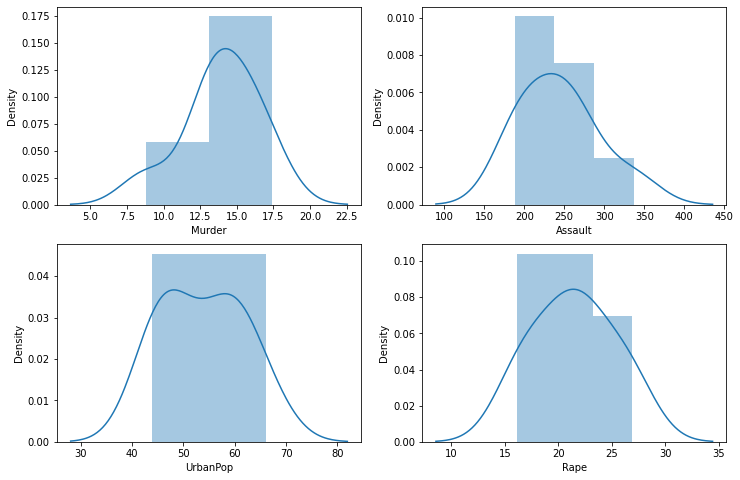

In [249]:

plt.figure(figsize=(12,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.distplot(label1.iloc[:,i],kde=True)
#As all the desity plots have almost the normal dist, we can take the mean and compare it for analysis

In [207]:
df_mean=label0.describe()[1:2].transpose().copy()

In [225]:
column_names = ['Mean0', 'Mean1', 'Mean2', 'Mean3']

# Concatenate dataframes column-wise and specify new column names using 'keys' parameter
concatenated_df = pd.concat([label0.describe()[1:2].transpose(), label1.describe()[1:2].transpose(), label2.describe()[1:2].transpose(), label3.describe()[1:2].transpose()], axis=1, keys=column_names)


In [229]:
concatenated_df.columns=concatenated_df.columns.droplevel(1)

In [230]:
concatenated_df

,Mean0,Mean1,Mean2,Mean3
Murder,5.65625,13.9375,10.815385,3.600000
Assault,138.87500,243.6250,257.384615,78.538462
UrbanPop,73.87500,53.7500,76.000000,52.076923
Rape,18.78125,21.4125,33.192308,12.176923


# We used K Means to get the final pred output and from the labels we can say that->
### Murder: On Average Min murder rate is seen by Label0 cities and Max is seen by Label 1
### Assault: On Average Min Assualt rate is seen by Label2 cities and Max is seen by Label 3
### UrbanPop: On Average Min UrabanPop is seen by Label1 and Lable 3 cities and Max is seen by Label 0 and Label 2
### Rape: On Average Min Rape rate us seen by Label3 cities and Max is seen by Label 2

In [268]:
df.sort_values(by='Cluster_labels')

,Cluster_labels
Wyoming,0
New Jersey,0
Kansas,0
Ohio,0
Indiana,0
Oklahoma,0
Oregon,0
Hawaii,0
Pennsylvania,0
Delaware,0
